In [1]:
import echelle

import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk

In [2]:
%matplotlib notebook

from matplotlib import rcParams
rcParams["figure.dpi"] = 150

In [3]:
lc = lk.search_lightcurvefile('KIC 11615890', cadence='long', mission='Kepler').download_all().PDCSAP_FLUX.stitch().remove_nans().remove_outliers()

<IPython.core.display.Javascript object>


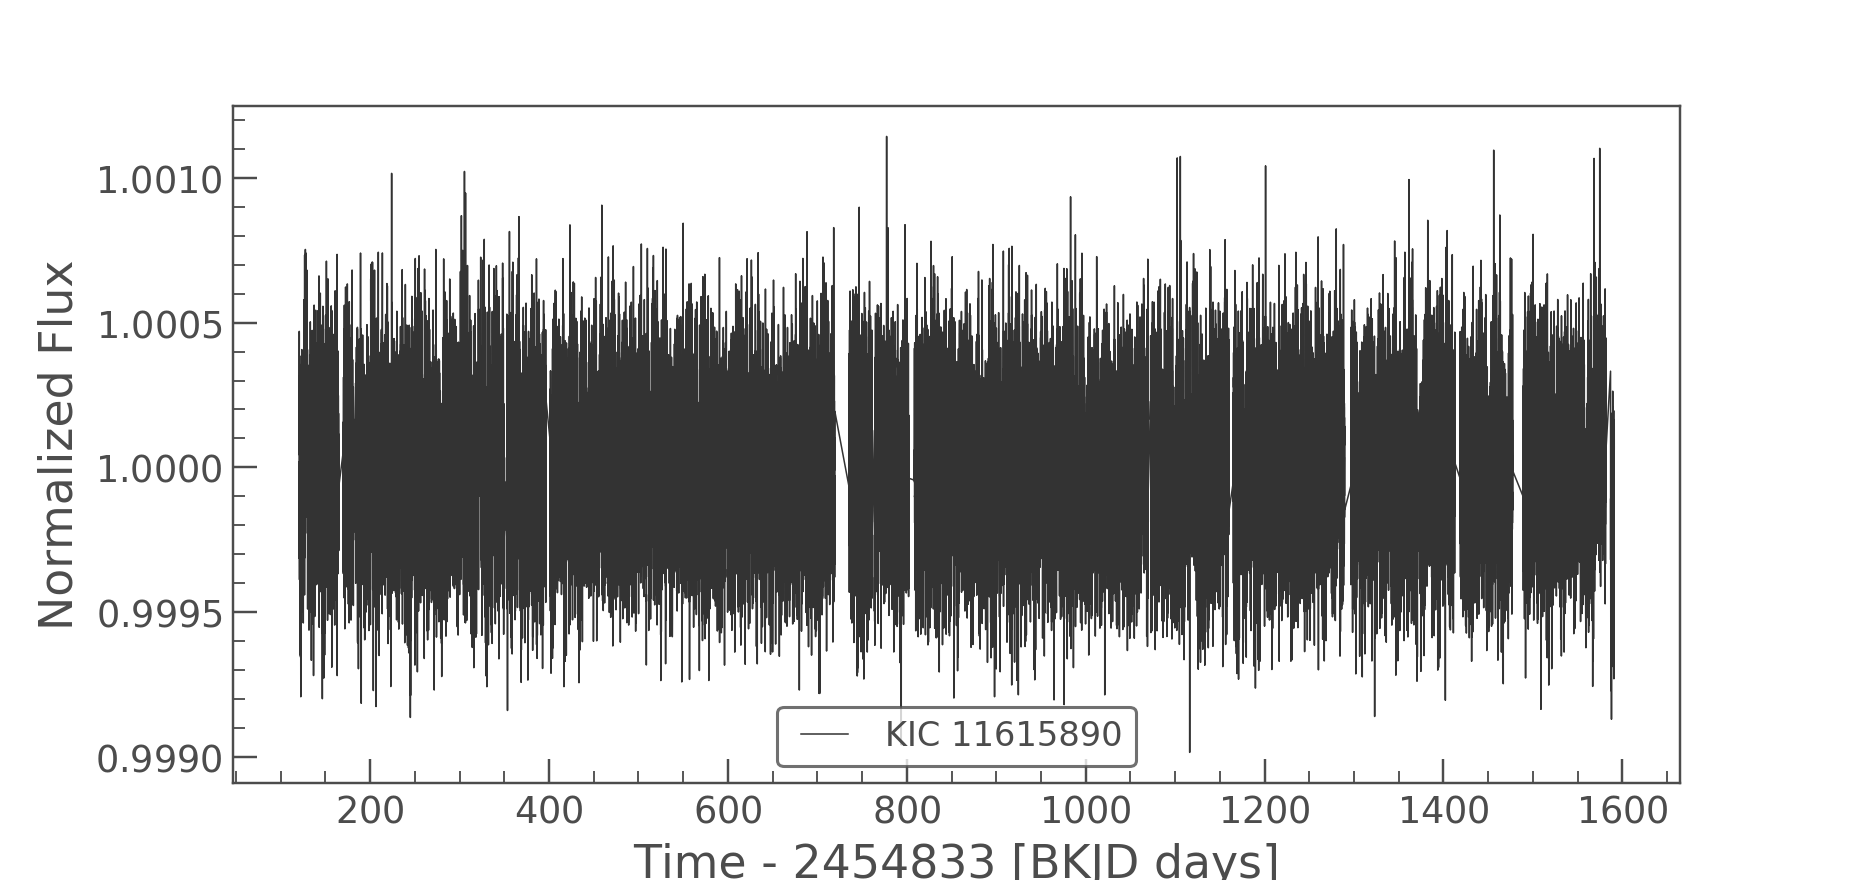

In [4]:
lc.plot()

<IPython.core.display.Javascript object>


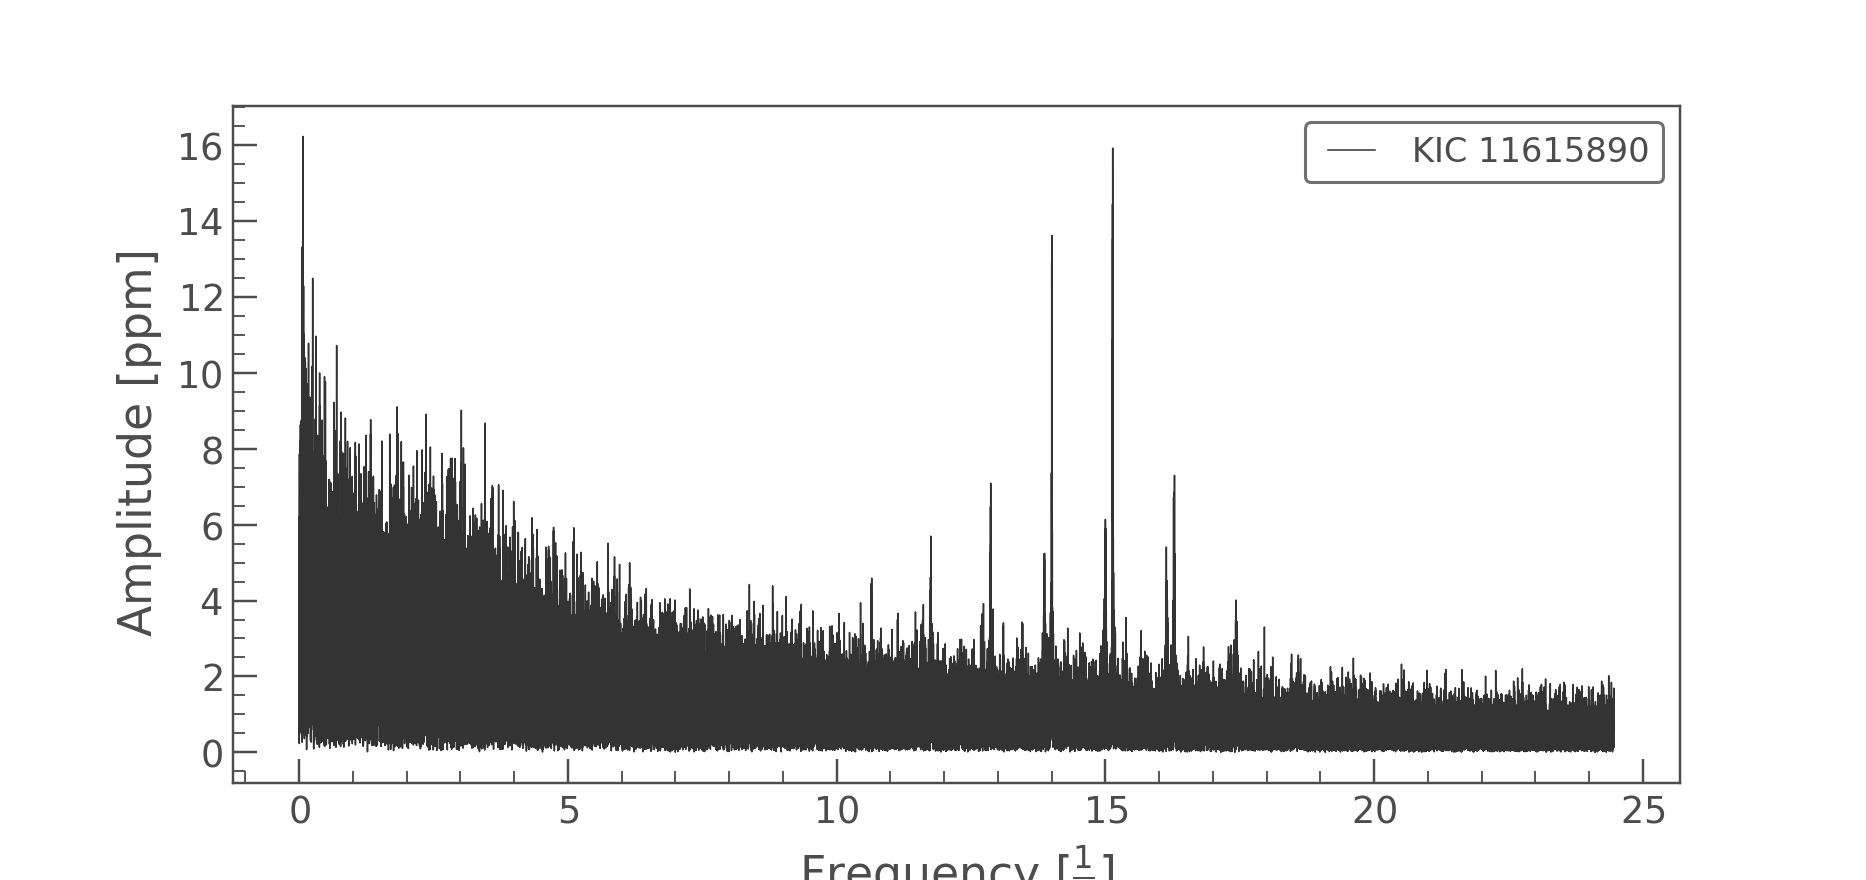

In [5]:
pg = lc.to_periodogram()
pg.plot()

In [6]:
frequency, amplitude = pg.frequency.value, pg.power.value

In [11]:
%matplotlib qt
0.0

<IPython.core.display.Javascript object>


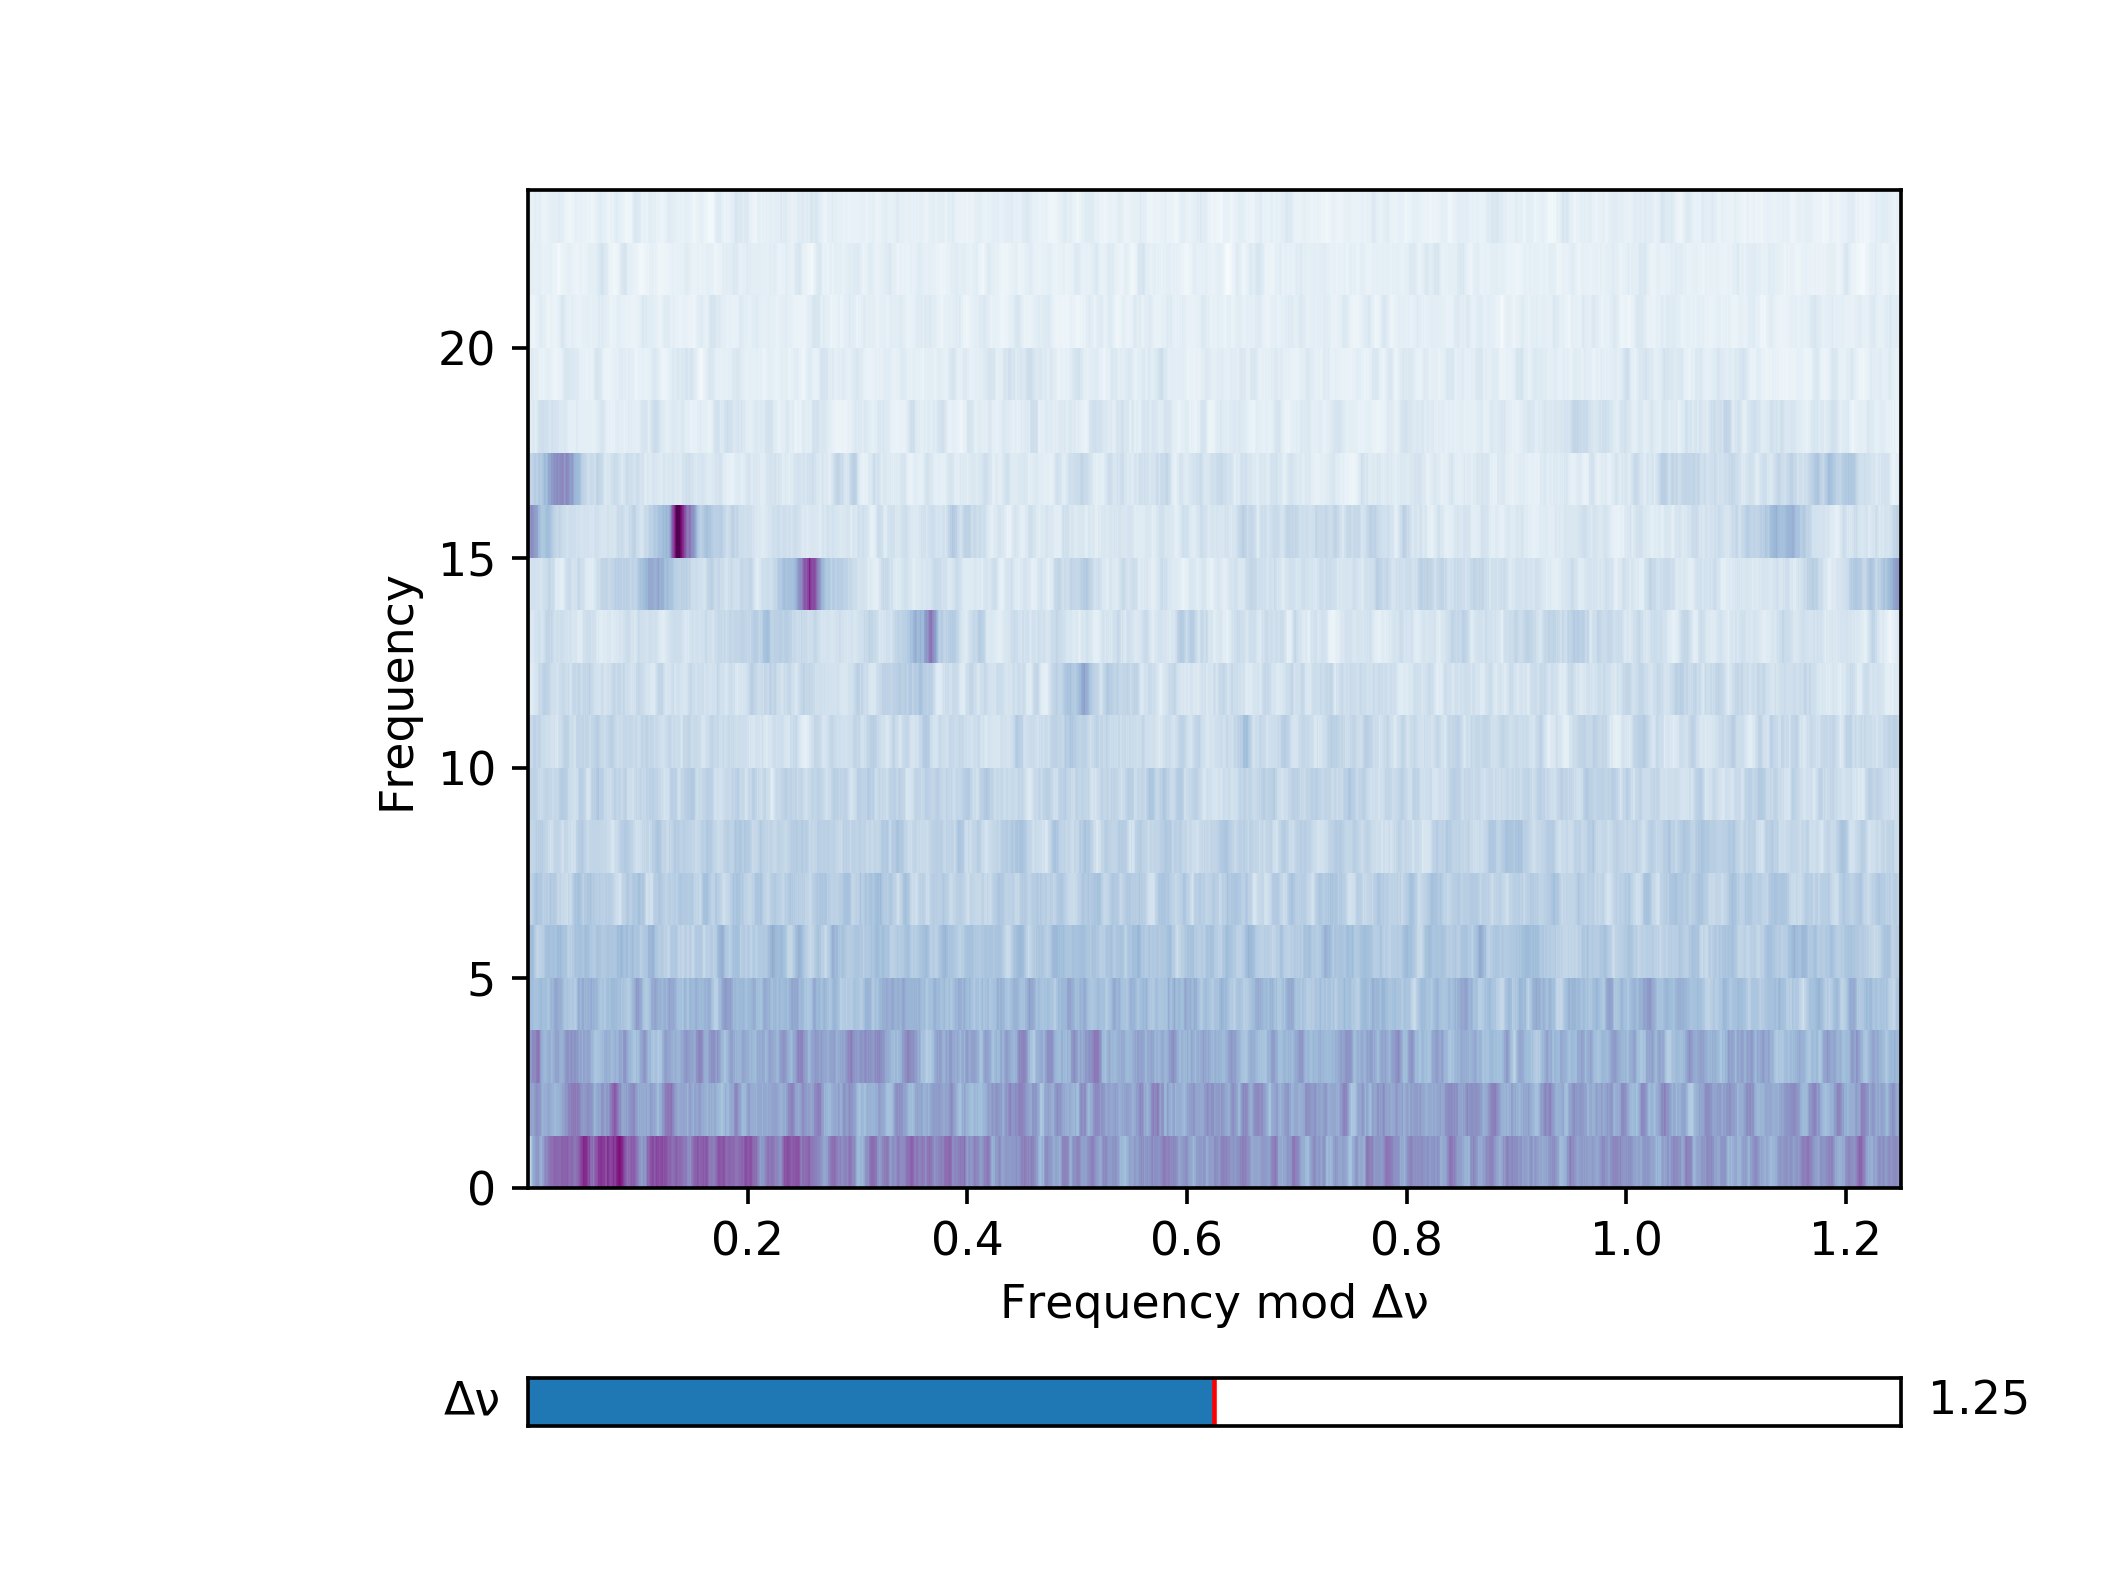

In [10]:
echelle.interact_echelle(frequency, amplitude, 0.5, 2, step=0.01)

If you have a large amount of data, it is usually preferable to zoom in on the relevant regions to avoid the expensive re-plotting:

<IPython.core.display.Javascript object>


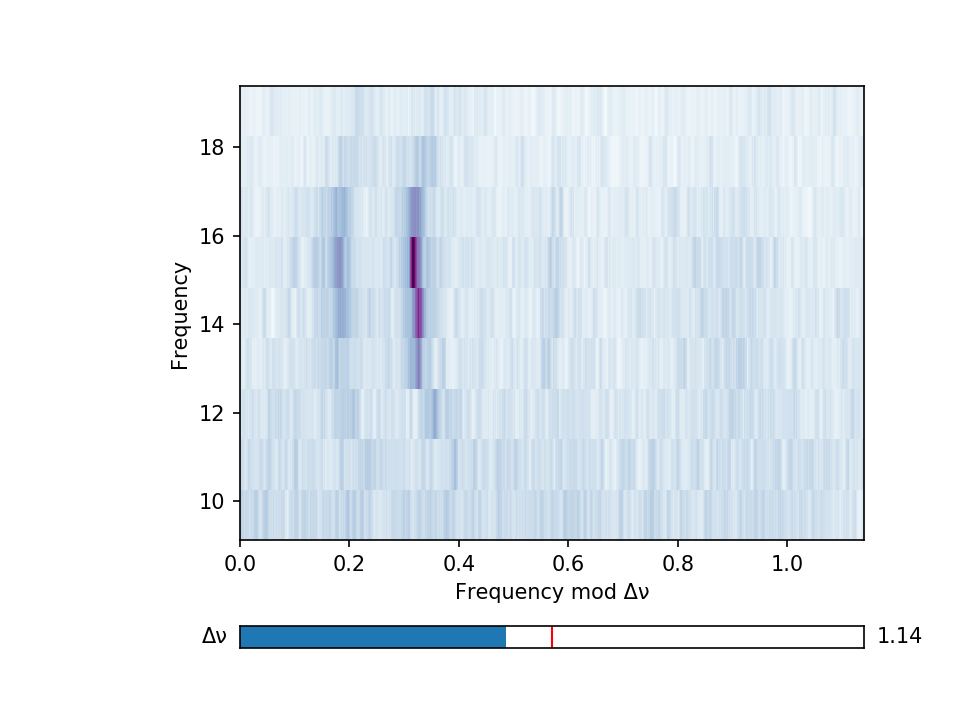

In [9]:
echelle.interact_echelle(frequency, amplitude, 0.5, 2, step=0.01, fmin=10, fmax=20)

There are a few features in interact_echelle that may be useful for you. One of them is an argument to return any frequencies that were clicked on. To do this, we must specify `return_coords=True`. We can see this in action below:

<IPython.core.display.Javascript object>


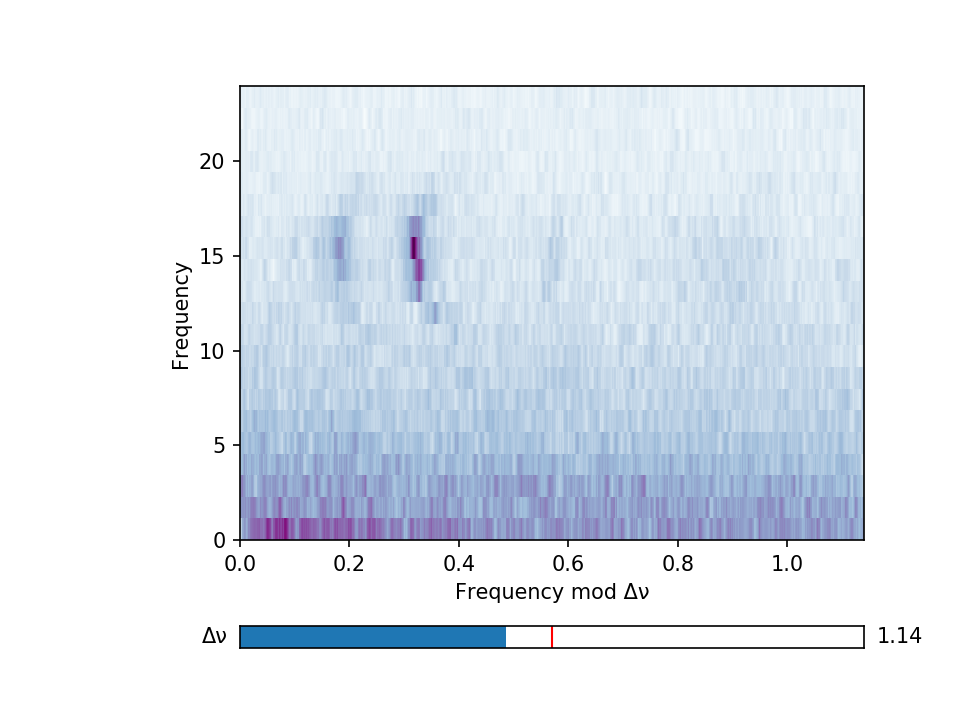

In [10]:
clicked_frequencies = echelle.interact_echelle(frequency, amplitude, 0.5, 2, step=0.01, return_coords=True)

You can't see it, but I clicked on a few of the frequencies along the strongest ridge. They're stored as a list and can be accessed like so

In [11]:
clicked_frequencies

[(1.1602689302884617, 0.41521990740740744),
 (0.35565054086538467, 11.92612847222222),
 (0.33372746394230773, 13.087239583333332),
 (0.3282466947115385, 13.984461805555554),
 (0.32093900240384615, 15.30390625),
 (0.32276592548076927, 16.306684027777777),
 (0.3410351562500001, 17.573350694444443),
 (0.35199669471153844, 18.470572916666665)]

Note that these are the x, y coordinates of the echelle diagram. The first column is the frequency modulo dnu, the second is the frequency. 

If you want to use your own plotting routines, or want to do something fancy with the echelle values (like plotting a collapsed echelle diagram!), you can just call `echelle.echelle`. Note that `echelle.echelle` is very barebones, and will not perform any smoothing of your data. If you want to do that, you must smooth your amplitudes before passing them in!

<IPython.core.display.Javascript object>


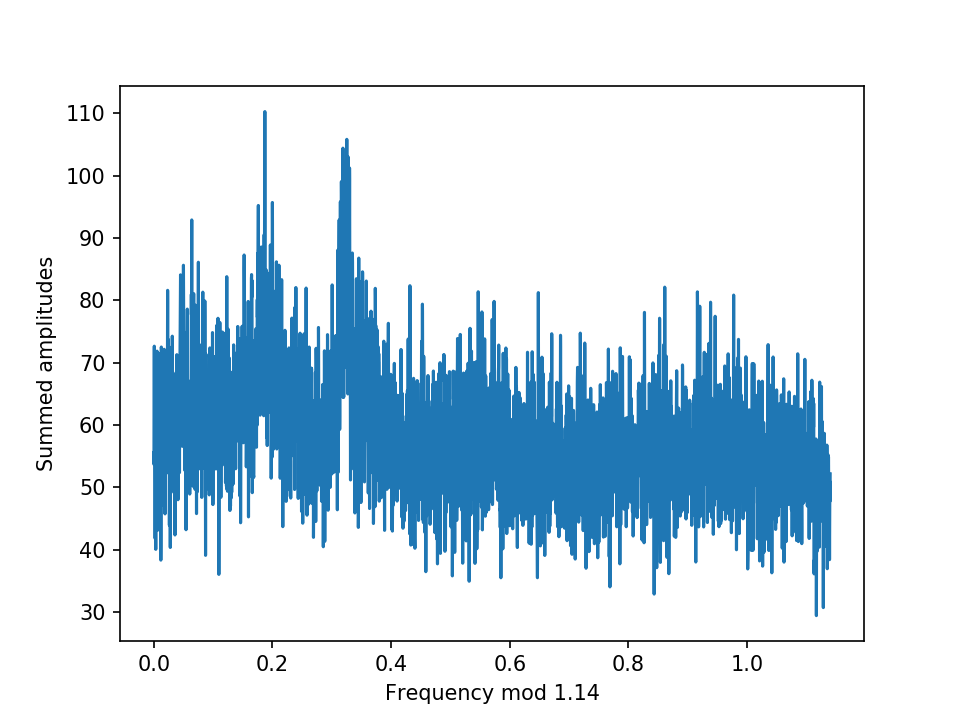

Text(0, 0.5, 'Summed amplitudes')

In [13]:
x, y, z = echelle.echelle(frequency, amplitude, 1.14)

plt.plot(x, np.sum(z, axis=0))
plt.xlabel('Frequency mod 1.14')
plt.ylabel('Summed amplitudes')

And that's mostly it! There are a lot of extra parameters that can be passed into the functions. So check out the docs.